#Proyek Analisis Data: E-Commerce Public Dataset

* Nama: Abdullah Hisyam Rayyanov
* Email: ibamhisyam@gmail.com
* ID Dicoding: hisyamrayyanov

#Pertanyaan:
1. Produk dengan kategori apa yang memiliki penjualan terbanyak pada tahun 2017?
2. Apa saja 10 produk teratas yang memiliki rating di atas 4 pada tahun 2017, dan bagaimana distribusinya berdasarkan kategori produk untuk membantu kita menentukan prioritas peningkatan kualitas?

# Library yang Digunakan

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling


##Gathering Data

In [217]:
order_items_df = pd.read_csv('/order_items_dataset.csv')
order_reviews_df = pd.read_csv('/order_reviews_dataset.csv')
orders_df = pd.read_csv('/orders_dataset.csv')
product_category_name_translation_df = pd.read_csv('/product_category_name_translation.csv')
products_df = pd.read_csv('/products_dataset.csv')

###Data Order Items

In [149]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


###Data Product

In [150]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


###Data Order Review

In [151]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


###Data Orders

In [152]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


###Data Category Name Translation

In [153]:
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Insight:

*   orders_items_df memberikan informasi terkait produk yang paling diminati oleh pelanggan
*   products_df memberikan informasi terkait produk mana yang memiliki penjualan tertinggi
*   order_reviews_df menampilkan produk mana yang memiliki rating score tertinggi
* orders_df menampilkan status pengiriman, frekuensi, dan timestamp saat order dilakukan, diterima, dan diantar
* product_catergory_name_translation_df digunakan untuk memudahkan pemahaman terhadap produk apa yang tersedia dengan menggunakan bahasa inggris





##Assessing Data

In [169]:
order_items_df.info()
print(order_items_df.isna().sum())
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [160]:
products_df.info()
print(products_df.isna().sum())
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [161]:
order_reviews_df.info()
print(order_reviews_df.isna().sum())
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [164]:
orders_df.info()
print(orders_df.isna().sum())
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##

**orders_item_df**
1. Terdapat 112650 jumlah data
2. Tidak ada missing value dan duplikasi
3. Terdapat kesalahan tipe data pada shipping_limit_date
**products_df**
1. Terdapat 32341 jumlah data
2. Missing value sejumlah 610 pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty
3. Missing value sejumlah 2 pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
4. Tidak terdapat duplikasi
**order_reviews_df**
1. Terdapat 99441 jumlah data
2. Missing value sejumlah 87656 pada review_comment_title dan sejumlah 58247 pada review_comment_message.
3. Tidak ada duplikasi
4. Terdapat kesalahan tipe data pada review_creation_date dan review_answer_timestamp
**orders_df**
1. Terdapat 99411 jumlah data
2. Missing value pada order_approved_at sejumlah 160, order_delivered_carrier_date sejumlah 1783, dan order_delivered_customer_date 2965
3. Kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date
4. Tidak ada jumlah duplikasi





##Cleaning Data

In [172]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [173]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [174]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [175]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)
products_df.isna().sum()

<ipython-input-175-35c88160daba>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [177]:
products_df.product_description_lenght.value_counts()

,count
product_description_lenght,
404.0,94
729.0,86
651.0,66
703.0,66
236.0,65
...,...
2795.0,1
2308.0,1
3698.0,1


In [178]:
products_df.product_description_lenght.fillna(value=404.0, inplace=True)
products_df.isna().sum()

<ipython-input-178-ae833a9b0ed6>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [179]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,404.0,NaN,1300.0,45.0,16.0,45.0


In [183]:
products_df.product_name_lenght.fillna(value=60.0, inplace=True)
products_df.isna().sum()

<ipython-input-183-34a73c75e337>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [185]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [186]:
products_df.product_photos_qty.value_counts()

,count
product_photos_qty,
1.0,16489
2.0,6263
3.0,3860
4.0,2428
5.0,1484
6.0,968
7.0,343
8.0,192
9.0,105


In [187]:
products_df.product_photos_qty.fillna(value=1.0, inplace=True)
products_df.isna().sum()

<ipython-input-187-04a1c87cedda>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [188]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,NaN,NaN,NaN,NaN


In [189]:
products_df.product_weight_g.value_counts()

,count
product_weight_g,
200.0,2084
300.0,1561
150.0,1259
400.0,1206
100.0,1188
...,...
6075.0,1
822.0,1
631.0,1


In [190]:
products_df.product_weight_g.fillna(value=200.0, inplace=True)
products_df.isna().sum()

<ipython-input-190-447650a49d07>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [191]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,NaN,NaN,NaN


In [192]:
products_df.product_length_cm.value_counts()

,count
product_length_cm,
16.0,5520
20.0,2816
30.0,2029
18.0,1502
25.0,1387
...,...
96.0,4
10.0,3
8.0,2


In [193]:
products_df.product_length_cm.fillna(value=16.0, inplace=True)
products_df.isna().sum()

<ipython-input-193-d2865b875708>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,2
product_width_cm,2


In [194]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,NaN,NaN


In [195]:
products_df.product_height_cm.value_counts()

,count
product_height_cm,
10.0,2548
15.0,2022
20.0,1991
16.0,1595
11.0,1551
...,...
98.0,2
97.0,2
99.0,1


In [196]:
products_df.product_height_cm.fillna(value=10.0, inplace=True)
products_df.isna().sum()

<ipython-input-196-e95317af0214>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,2


In [197]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,10.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,NaN


In [198]:
products_df.product_width_cm.value_counts()

,count
product_width_cm,
11.0,3718
20.0,3053
16.0,2808
15.0,2393
30.0,1786
...,...
103.0,1
86.0,1
98.0,1


In [199]:
products_df.product_width_cm.fillna(value=11.0, inplace=True)
products_df.isna().sum()

<ipython-input-199-6ffe1a3ea46a>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [200]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [201]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [202]:
order_reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)
order_reviews_df.isna().sum()

<ipython-input-202-344ff30e8c66>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [203]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [204]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
Muito bom,230
Bom,189
muito bom,122
bom,107
Recomendo,100
...,...
PRODUTO FOI ENTREGUE VIA CORREIOS\r\nANTES DO PRAZO PREVISTO.,1
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1


In [205]:
order_reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)
order_reviews_df.isna().sum()

<ipython-input-205-8d3e20f3e795>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [254]:
datetime_columns = ["order_approved_at", "order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight**
1. Menangani kesalahan tipe data, mengonversi kolom tanggal dan waktu ke tipe datetime menggunakan pd.to_datetime().
2. Menangani missing values dengan mengganti nilai default yang dianggap relevan
3. Menggunakan .value_counts() untuk melihat distribusi nilai untuk menentukan nilai default

##Visualization & Explanatory Analysis

###Produk dengan kategori apa yang memiliki penjualan tertinggi

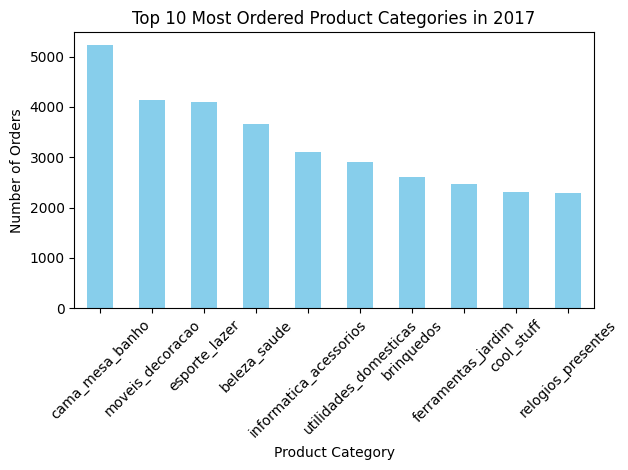

In [241]:
merged_df = pd.merge(order_items_df, products_df[['product_id', 'product_category_name']], on='product_id')

merged_df = pd.merge(merged_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')

merged_df = merged_df.dropna(subset=['order_purchase_timestamp'])

merged_df_2017 = merged_df[merged_df['order_purchase_timestamp'].dt.year == 2017]

most_ordered_categories = merged_df_2017['product_category_name'].value_counts().head(10)

most_ordered_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Ordered Product Categories in 2017')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari data diatas didapatkan 10 kategori yang paling sering di order

###Apa saja produk 10 teratas yang memiliki rating di atas 4 pada tahun 2017, dan bagaimana distribusinya berdasarkan kategori produk untuk membantu kita menentukan prioritas peningkatan kualitas?

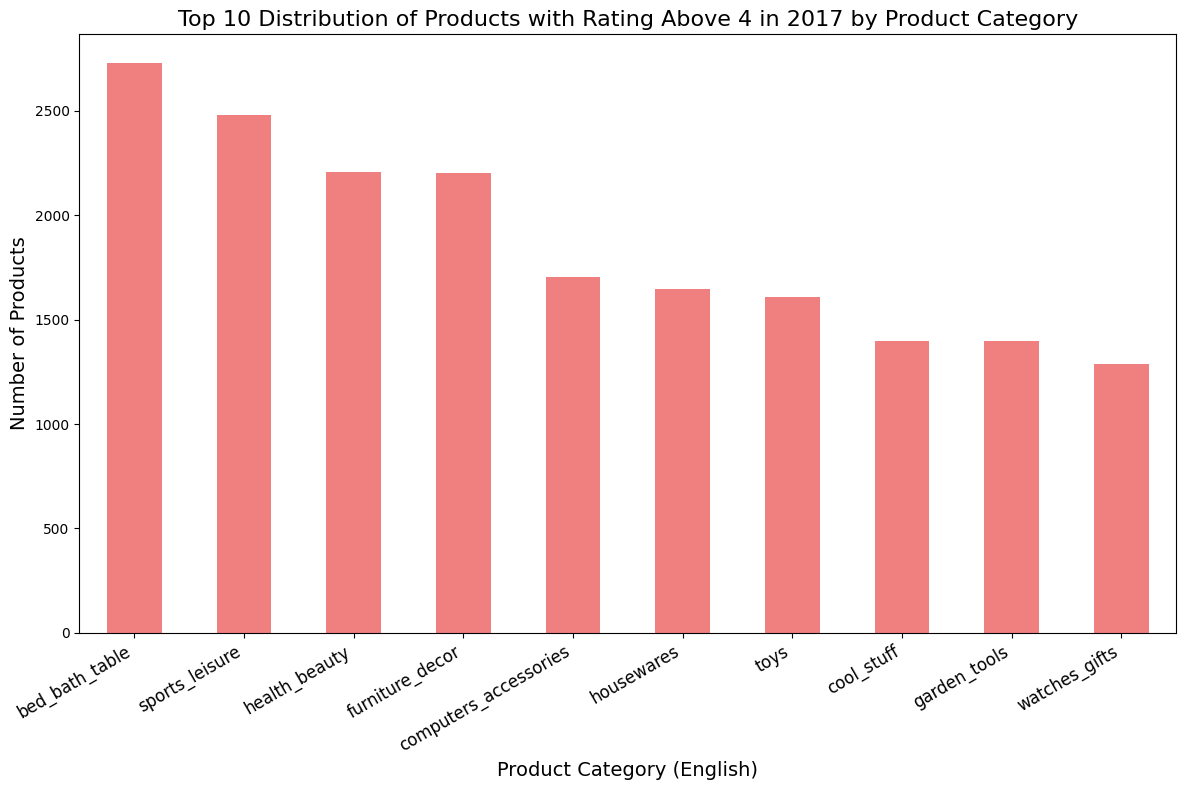

In [250]:
merged_df = pd.merge(order_items_df, products_df[['product_id', 'product_category_name']], on='product_id')

merged_df = pd.merge(merged_df, product_category_name_translation_df, on='product_category_name')

merged_df = pd.merge(merged_df, order_reviews_df[['order_id', 'review_score']], on='order_id')

merged_df = pd.merge(merged_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')

merged_df = merged_df.dropna(subset=['order_purchase_timestamp'])

merged_df_2017 = merged_df[merged_df['order_purchase_timestamp'].dt.year == 2017]

high_rated_products = merged_df_2017[merged_df_2017['review_score'] > 4]

category_distribution = high_rated_products['product_category_name_english'].value_counts().head(10)

plt.figure(figsize=(12, 8))
category_distribution.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Distribution of Products with Rating Above 4 in 2017 by Product Category', fontsize=16)
plt.xlabel('Product Category (English)', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

**Insight**
1. Produk dengan kategori apa yang memiliki penjualan tertinggi:
* Identifikasi Tren: Kategori produk yang paling banyak terjual dapat memberikan wawasan tentang tren konsumen dan preferensi pasar.
* Strategi Pemasaran: Pemilik bisnis dapat menggunakan informasi ini untuk memfokuskan strategi pemasaran dan promosi pada kategori yang paling laku. Misalnya, menawarkan diskon, bundle, atau iklan khusus untuk produk dalam kategori tersebut untuk meningkatkan penjualan lebih lanjut.

2. Apa saja produk 10 teratas yang memiliki rating di atas 4 pada tahun 2017, dan bagaimana distribusinya berdasarkan kategori produk untuk membantu kita menentukan prioritas peningkatan kualitas?
* Kualitas Produk: Produk dengan rating tinggi biasanya memiliki kualitas yang baik, hal ini bisa dimanfaatkan dengan mengetahui bagaimana perusahaan memahami hal-hal apa saja yang memuaskan pelanggan.
* Rekomendasi dan Pemasaran: Produk dengan rating tinggi bisa menjadi kandidat terbaik untuk dipromosikan dalam kampanye pemasaran. Menggunakan testimoni dari pelanggan yang puas dapat meningkatkan kepercayaan konsumen baru dan meningkatkan konversi.
* Pemetaan Kategori Kualitas: Dengan menganalisis distribusi produk berkualitas tinggi berdasarkan kategori, perusahaan dapat memahami kategori mana yang berhasil dan mana yang mungkin perlu perbaikan. Jika banyak produk dengan rating tinggi berasal dari kategori tertentu, itu menunjukkan bahwa perusahaan mungkin sudah berhasil dalam kategori tersebut, sedangkan kategori lainnya mungkin memerlukan perhatian lebih.

##Analisis Lanjutan (RFM)

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703     2515          1     89.80
1  000161a058600d5901f007fab4c27140     2636          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079     2774          1    179.99
3  0002414f95344307404f0ace7a26f1d5     2605          1    149.90
4  000379cdec625522490c315e70c7a9fb     2376          1     93.00


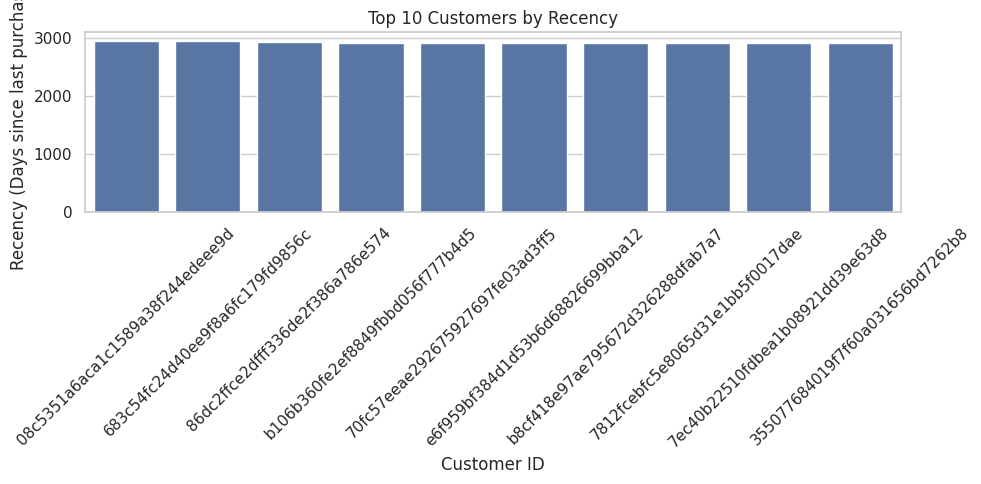

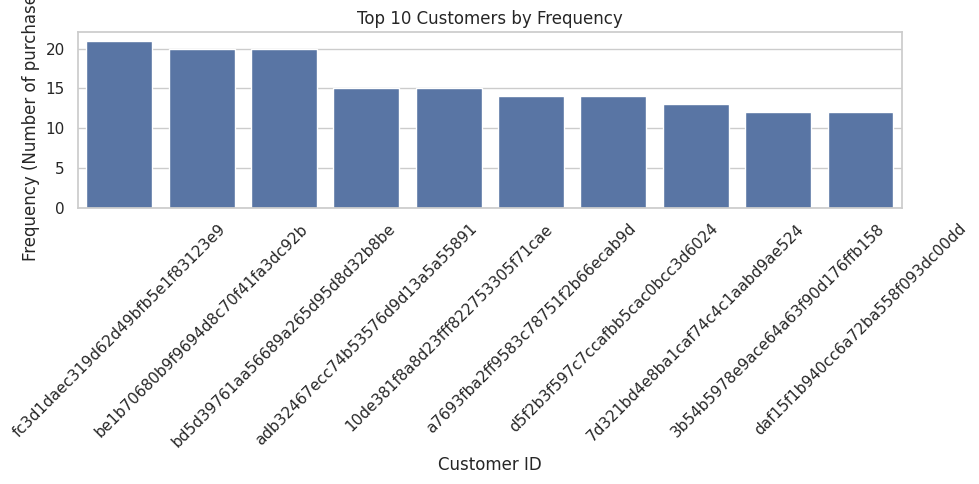

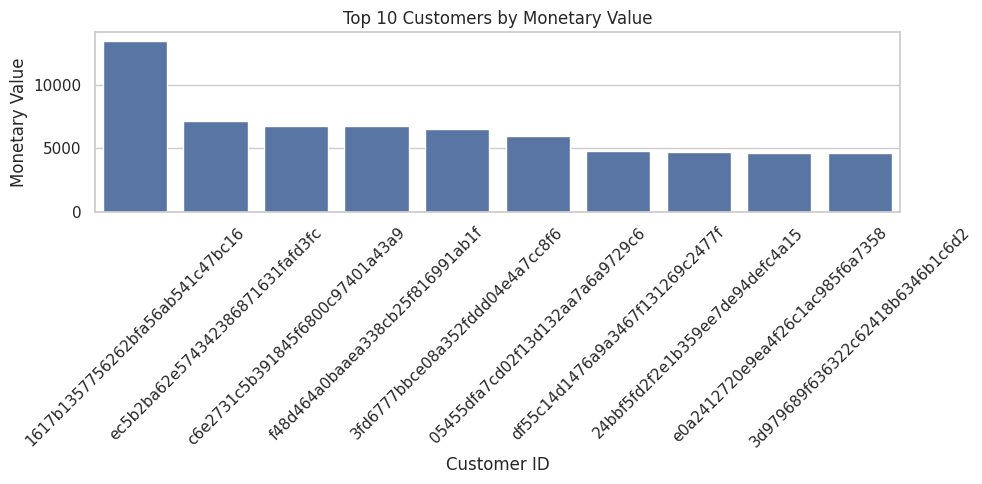

In [262]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

analysis_date = pd.Timestamp('2024-10-04')

merged_df = pd.merge(orders_df, order_items_df[['order_id', 'price']], on='order_id')

rfm_df = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}).reset_index()

print(rfm_df.head())

plt.figure(figsize=(10, 5))
sns.barplot(x='customer_id', y='Recency', data=rfm_df.sort_values('Recency', ascending=False).head(10))
plt.title('Top 10 Customers by Recency')
plt.xlabel('Customer ID')
plt.ylabel('Recency (Days since last purchase)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='customer_id', y='Frequency', data=rfm_df.sort_values('Frequency', ascending=False).head(10))
plt.title('Top 10 Customers by Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Frequency (Number of purchases)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='customer_id', y='Monetary', data=rfm_df.sort_values('Monetary', ascending=False).head(10))
plt.title('Top 10 Customers by Monetary Value')
plt.xlabel('Customer ID')
plt.ylabel('Monetary Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Conclusion

1. Kategori Produk Paling Laku:
Analisis menunjukkan bahwa kategori produk tertentu memiliki tingkat penjualan yang signifikan pada tahun 2017. Kategori ini dapat digunakan untuk mengarahkan strategi pemasaran dan pengembangan produk. Mengidentifikasi kategori paling laku membantu perusahaan dalam merencanakan stok dan kampanye promosi yang lebih efektif, yang pada gilirannya dapat meningkatkan profitabilitas.

2. Produk dengan Rating di Atas 4:
Hasil analisis mengungkapkan bahwa ada sejumlah produk yang mendapatkan rating tinggi, mencerminkan kualitas dan kepuasan pelanggan. Distribusi produk berkualitas tinggi berdasarkan kategori memberikan wawasan tentang area kekuatan dan peluang untuk perbaikan. Fokus pada produk dengan rating tinggi dapat memperkuat brand loyalty dan mendorong penjualan lebih lanjut.

3. Analisis RFM:
Analisis RFM mengungkapkan wawasan penting tentang perilaku pelanggan. Dengan membagi pelanggan berdasarkan Recency, Frequency, dan Monetary, perusahaan dapat mengidentifikasi segmen pelanggan yang paling berharga dan merancang strategi pemasaran yang ditargetkan.
Recency menunjukkan kapan terakhir kali pelanggan melakukan pembelian, membantu mengidentifikasi pelanggan yang mungkin perlu dipicu untuk kembali bertransaksi.
Frequency mengindikasikan seberapa sering pelanggan melakukan pembelian, yang berguna untuk merangsang pembelian ulang.
Monetary memberikan informasi tentang total pengeluaran, yang menunjukkan pelanggan dengan potensi pengeluaran tertinggi.